In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('netflix_file.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#length of data
len(df)

8807

In [ ]:
#checking datatype for all attributes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#null values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#No. of unique values for each column
for i in df.columns:
  print (i,':', df[i].nunique())

show_id : 8807
type : 2
title : 8804
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [ ]:
#unnesting the 'director' column
constraints=df['director'].apply(lambda x: str(x).split(', ')).tolist()
new_dfs=(pd.DataFrame(constraints,index=df['title'])).stack()
new_dfs = new_dfs.reset_index([0, 'title'])
new_dfs.columns = ['title', 'director']
new_dfs.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
new_dfs.shape

(9612, 2)

In [ ]:
#unnesting the 'cast' column
constraint1=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
new_df=(pd.DataFrame(constraint1,index=df['title'])).stack()
new_df = new_df.reset_index([0, 'title'])
new_df.columns = ['title', 'cast']
new_df.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
new_df.shape

(64951, 2)

In [ ]:
#unnesting the 'country' column
constraint2=df['country'].apply(lambda x: str(x).split(', ')).tolist()
new_df1=(pd.DataFrame(constraint2,index=df['title'])).stack()
new_df1 = new_df1.reset_index([0, 'title'])
new_df1.columns = ['title', 'country']
new_df1.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [ ]:
new_df1.shape

(10845, 2)

In [ ]:
#unnesting the 'listed_in' column
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
new_df2=(pd.DataFrame(constraint3,index=df['title'])).stack()
new_df2 = new_df2.reset_index([0, 'title'])
new_df2.columns = ['title', 'listed_in']
new_df2.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
new_df2.shape

(19323, 2)

In [ ]:
#merging all unnested data files together

merged_df1=new_dfs.merge(new_df, left_on='title', right_on='title')
merged_df2=merged_df1.merge(new_df1, left_on='title', right_on='title')
merged_df3=merged_df2.merge(new_df2, left_on='title', right_on='title')
final_merge=merged_df3.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
final_merge.head()


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
final_merge.shape

(204571, 11)

In [ ]:
#Null values in country column are replaced on the basis of the country in which that title's director produces majority of movies/TV shows.

for i in final_merge[final_merge['country'].isnull()]['director'].unique():
  if i in final_merge[~final_merge['country'].isnull()]['director'].unique():
    imp=final_merge[final_merge['director']==i]['country'].mode().values[0]
    final_merge.loc[final_merge['director']==i,'country']=final_merge.loc[final_merge['director']==i,'country'].fillna(imp)

#If there are still nulls, I just replace it by Unknown Country
final_merge['country'].fillna('Unknown',inplace=True)
final_merge.isnull().sum()

title             0
director          0
cast              0
country           0
listed_in         0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [ ]:
#Count of each rating type
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In rating column, we have the last 3 values which are in minutes. Also, the duration column has 3 values that are Null. This seems to be an error in data and these rating values in minutes should have been added in the corresponding duration column for that title respectively. So the duration column nulls are now replaced by corresponding values in ratings column.

In [ ]:
#adding those min rating column values in duration column
final_merge.loc[final_merge['duration'].isnull(),'duration']=final_merge.loc[final_merge['duration'].isnull(),'duration'].fillna(final_merge['rating'])
final_merge.loc[final_merge['rating'].str.contains('min', na=False),'rating']='Unknown'
final_merge.isnull().sum()

title             0
director          0
cast              0
country           0
listed_in         0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          0
dtype: int64

In [ ]:
#Now replacing those 3 rating values in minutes with 'Unknown'
final_merge.loc[final_merge['rating'].str.contains('min', na=False),'rating']='Unknown'
final_merge['rating'].fillna('Unknown',inplace=True)
pd.set_option('display.max_rows',None)

In [ ]:
#Null values in date_added column are replaced on the basis of mode of the corresponding release_year for that title.
for i in final_merge[final_merge['date_added'].isnull()]['release_year'].unique():
  imp=final_merge[final_merge['release_year']==i]['date_added'].mode().values[0]
  final_merge.loc[final_merge['release_year']==i,'date_added']=final_merge.loc[final_merge['release_year']==i,'date_added'].fillna(imp)

In [ ]:
final_merge.shape

(204571, 11)

In [ ]:
final_merge.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
final_merge['duration'].value_counts()

1 Season      35635
2 Seasons      9559
3 Seasons      5084
94 min         4343
106 min        4040
97 min         3624
95 min         3560
96 min         3484
93 min         3480
90 min         3305
105 min        3209
107 min        3103
101 min        3048
102 min        3017
103 min        2985
98 min         2984
99 min         2956
91 min         2915
92 min         2863
104 min        2822
88 min         2781
110 min        2711
100 min        2697
108 min        2614
112 min        2594
85 min         2486
89 min         2420
124 min        2310
86 min         2213
4 Seasons      2134
116 min        2122
118 min        2119
119 min        2075
87 min         2063
109 min        2020
113 min        1990
120 min        1845
117 min        1770
121 min        1728
5 Seasons      1698
111 min        1667
144 min        1563
114 min        1529
127 min        1505
115 min        1444
123 min        1398
125 min        1299
122 min        1298
84 min         1268
128 min        1241


In [ ]:
#removing mins from data
final_merge['duration']=final_merge['duration'].str.split(' ',expand=True)[0]
final_merge.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2


In [ ]:
final_merge.shape

(204571, 11)

In [ ]:
d1=final_merge.copy()

In [ ]:
#adding a column for year_added from date_added for analysis
d1['year_added'] = pd.to_datetime(d1['date_added']).dt.year
d1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,2021
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021


In [ ]:
#adding a column for month_added from date_added for analysis
d1['month_added'] = pd.to_datetime(d1['date_added']).dt.month
d1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,2021,9
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9


In [ ]:
#adding a column for quarter_added from date_added for analysis
d1['quarter_added'] = pd.to_datetime(d1['date_added']).dt.quarter
d1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,year_added,month_added,quarter_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,2021,9,3
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3


In [ ]:
#adding a column for week_added from date_added for analysis
d1['week_added'] = pd.to_datetime(d1['date_added']).dt.isocalendar().week
d1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,year_added,month_added,quarter_added,week_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,2021,9,3,38
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3,38
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3,38
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3,38
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3,38


In [ ]:
d1.shape

(204571, 15)

# **ABOUT NETFLIX**


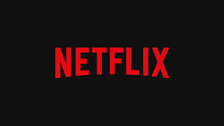


---

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.

##**DATASET DESCRIPTION**


---





This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

*   We have details on 8807 Movies and TV shows and each has a unique show ID
*   Every upload is classified as movie or show through column 'type'
*   The release year ranges from 1925 to 2021
*   Details available for the content added on the platform between April 1, 2014 to September 9, 2021
*   Movies/shows with 14 unique rating types
*   Duration is in minutes for movies and no. of seasons for shows

##**PROBLEM STATEMENT**


---
Deciding what type of shows/movies to produce to grow business in different countries

**Univariate Analysis**

In [ ]:
#No. of Movies and TV shows in total

d1.groupby('type')['show_id'].nunique()

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

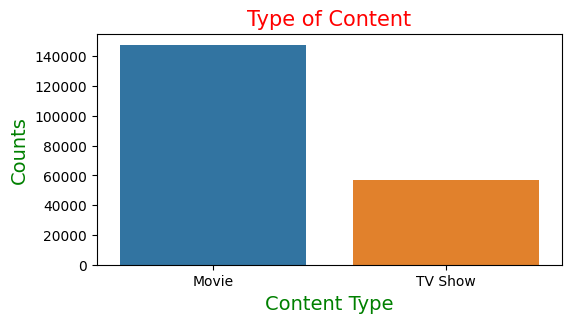

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=d1, x="type")
plt.xlabel('Content Type',  fontsize=14, color='green')
plt.ylabel('Counts', fontsize=14, color='green')
plt.title("Type of Content", color='red', fontsize=15 )

plt.show()

Movies are way higher in number than TV shows.
    

In [ ]:
#No. of Movies/shows for each rating

d1.groupby('rating')['show_id'].nunique().sort_values(ascending=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
Unknown        7
TV-Y7-FV       6
NC-17          3
UR             3
Name: show_id, dtype: int64

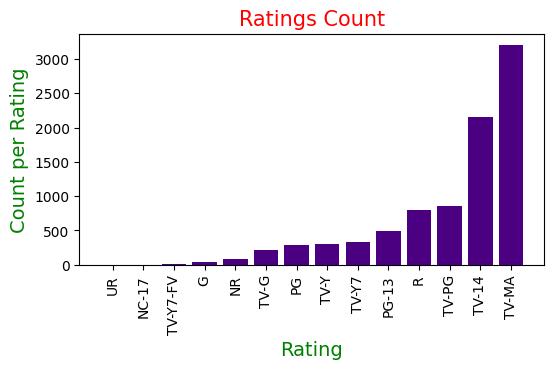

In [ ]:
df_rating=d1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(6,3))
df_rating=df_rating[df_rating['rating']!='Unknown']
plt.bar(df_rating[::-1]['rating'], df_rating[::-1]['title'],color='indigo')
plt.xlabel('Rating',  fontsize=14, color='green')
plt.ylabel('Count per Rating', fontsize=14, color='green')
plt.xticks(rotation=90)
plt.title('Ratings Count', fontsize=15, color='red')
plt.show()


Most of the content available is intended for Mature Audiences (TV-MA), content not intended for audience under 14 (TV-14) and which requires Parental Guidance (TV-PG)

In [ ]:
#Number of distinct show_ids on the basis of genre

temp=d1.groupby('listed_in').agg({"show_id":"nunique"})
temp.head()

,show_id
listed_in,
Action & Adventure,859
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,641


Visualisation for top 10 genres

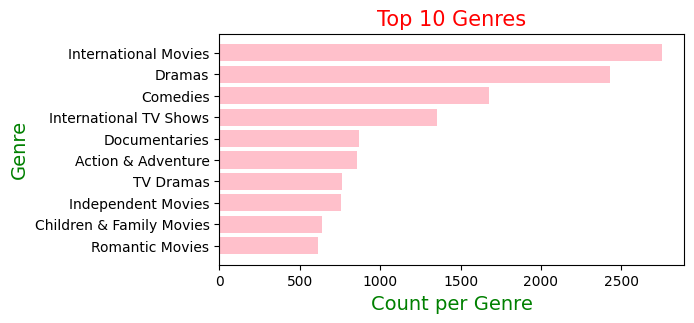

In [ ]:
df_genre=temp.reset_index().sort_values(by=['show_id'],ascending=False)[:10]
plt.figure(figsize=(6,3))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['show_id'],color=['pink'])
plt.xlabel('Count per Genre',  fontsize=14, color='green')
plt.ylabel('Genre', fontsize=14, color='green')
plt.title('Top 10 Genres', fontsize=15, color='red')
plt.show()

In [ ]:
#Number of distinct show_ids on the basis of country

d1.groupby(['country']).agg({"show_id":"nunique"})

,show_id
country,
,2
Afghanistan,1
Albania,1
Algeria,3
Angola,1
Argentina,91
Armenia,1
Australia,160
Austria,12


The above dataframe has a flaw where several countries are shown as , for example, 'Poland' and 'Poland,', or 'United Kingdom' and 'United Kingdom,' as different countries.They should have been same.

In [ ]:
d1['country'] = d1['country'].str.replace(',', '')
d1.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,year_added,month_added,quarter_added,week_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,2021,9,3,38
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3,38
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3,38
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3,38
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021,9,3,38


In [ ]:
#checking the count per country again now

d1.groupby(['country']).agg({"show_id":"nunique"})

,show_id
country,
,2
Afghanistan,1
Albania,1
Algeria,3
Angola,1
Argentina,91
Armenia,1
Australia,160
Austria,12


Top 5 countries are: USA, India, UK, Canada, France as per the count of distinct show_ids

In [ ]:
#Count of content available based on duration for Movies and TV shows seperately

d1.groupby(['type','duration']).agg({"show_id":"nunique"})

show_id
type    duration         
Movie   10              1
        100           108
        101           116
        102           122
        103           114
        104           104
        105           101
        106           111
        107            98
        108            87
        109            69
        11              2
        110            97
        111            68
        112            74
        113            69
        114            56
        115            61
        116            80
        117            61
        118            65
        119            63
        12              3
        120            56
        121            54
        122            45
        123            44
        124            52
        125            36
        126            44
        127            48
        128            41
        129            32
        13              3
        130            40
        131            34
        132            37
        133            42
        134            22
        135            39
        136            23
        137            38
        138            21
        139            22
        14              3
        140            25
        141            19
        142            13
        143            23
        144             9
        145            18
        146            13
        147            12
        148            19
        149            15
        15              3
        150            17
        151            15
        152             5
        153            11
        154            13
        155            10
        156            10
        157             6
        158            12
        159             6
        16              1
        160             6
        161            10
        162            14
        163            11
        164             4
        165             8
        166             8
        167             1
        168             7
        169             2
        17              3
        170             5
        171             7
        172             4
        173             6
        174             2
        176             5
        177             5
        178             1
        179             2
        18              1
        180             2
        181             4
        182             3
        185             6
        186             1
        187             2
        189             1
        19              2
        190             2
        191             1
        192             2
        193             1
        194             1
        195             2
        196             1
        20              2
        200             1
        201             1
        203             1
        204             2
        205             1
        208             1
        209             2
        21              3
        212             1
        214             1
        22             16
        224             1
        228             1
        229             1
        23             13
        230             1
        233             1
        237             1
        24             23
        25             11
        253             1
        26              6
        27              3
        273             1
        28             10
        29             11
        3               1
        30              6
        31              2
        312             1
        32              9
        33              6
        34              3
        35              5
        36              5
        37              3
        38              5
        39              2
        40             13
        41              3
        42              9
        43              1
        44             19
        45             10
        46             24
        47             11
        48              8
        49              9
        5     

Duration for most of the content is around 90 mins for movies and 1 season for TV shows.

In [ ]:
#number of unique show_ids based on Actors

d1.groupby(['director']).agg({"show_id":"nunique"}).head()

,show_id
director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1


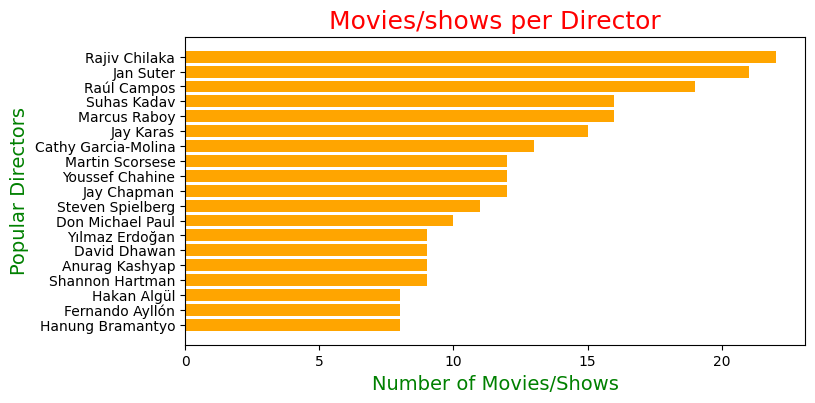

In [ ]:
#Top 20 directors

df_actors=d1.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(8,4))
df_actors=df_actors[df_actors['director']!='nan']
plt.barh(df_actors[::-1]['director'], df_actors[::-1]['title'],color=['orange'])
plt.xlabel('Number of Movies/Shows', color='green', fontsize= 14)
plt.ylabel('Popular Directors', color='green', fontsize= 14)
plt.title('Movies/shows per Director', color='red', fontsize= 18)
plt.show()

Above, we can see the list of top 20 directors on Netflix. Rajiv Chilaka, Jan Suter and Raul Campos top the chart.

In [ ]:
#number of unique show_ids based on Actors

temp1=d1.groupby(['cast']).agg({"show_id":"nunique"})
temp1.head()

,show_id
cast,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,2
2 Chainz,1
2Mex,1


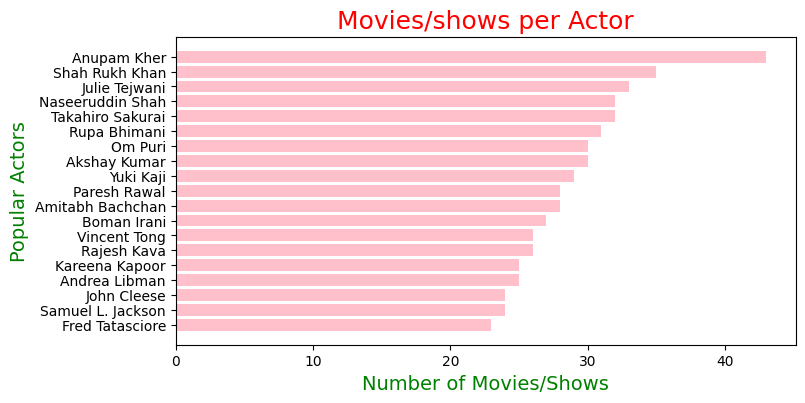

In [ ]:
#Top 20 actors

df_actors=temp1.reset_index().sort_values(by=['show_id'],ascending=False)[:20]
plt.figure(figsize=(8,4))
df_actors=df_actors[df_actors['cast']!='nan']
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['show_id'],color=['pink'])
plt.xlabel('Number of Movies/Shows', color='green', fontsize= 14)
plt.ylabel('Popular Actors', color='green', fontsize= 14)
plt.title('Movies/shows per Actor', color='red', fontsize= 18)
plt.show()

Above, we can see the list of top 20 actors on Netflix. Anupam Kher, Shah Rukh Khan and Julie Tejwani top the list.

In [ ]:
#number of unique show_ids based on release_year

temp_1=d1.groupby(['release_year']).agg({"show_id":"nunique"})
temp_1.head()

,show_id
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4


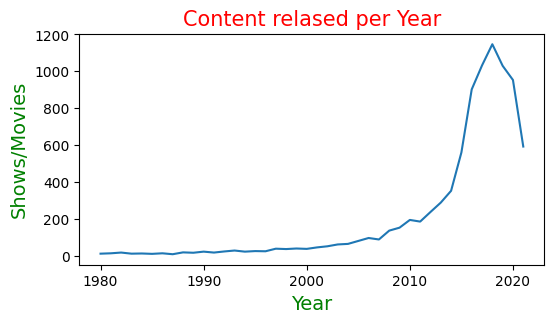

In [ ]:
df_release_year=d1[d1['release_year']>=1980].groupby(['release_year']).agg({"show_id":"nunique"}).reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_release_year, x='release_year', y='show_id')
plt.xlabel('Year', color='green', fontsize= 14)
plt.ylabel('Shows/Movies', color='green', fontsize= 14)
plt.title('Content relased per Year', color='red', fontsize= 15)
plt.show()

In the above line chart, we can observe that there has been an increase in the content released for each consecutive year till 2019. After that the numbers released per year have dropped.

In [ ]:
#number of unique show_ids based on year_added

temp2=d1.groupby(['year_added']).agg({"show_id":"nunique"})
temp2.head()

,show_id
year_added,
2008,2
2009,2
2010,1
2011,13
2012,3


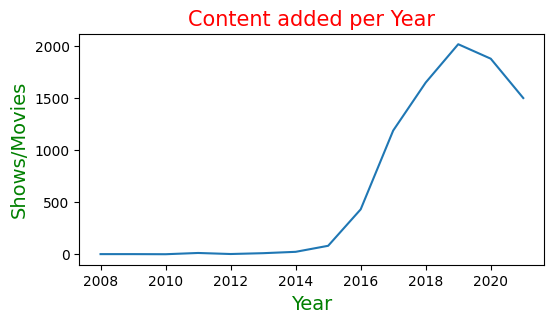

In [ ]:
df_year=temp2.reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_year, x='year_added', y='show_id')
plt.xlabel('Year', color='green', fontsize= 14)
plt.ylabel('Shows/Movies', color='green', fontsize= 14)
plt.title('Content added per Year', color='red', fontsize= 15)
plt.show()

In the above line chart, we can observe that there has been an increase in the content added on Netflix for each consecutive year till 2019. After that the numbers added per year have dropped. This may be due to effects of covid that less movies/shows were released and hence less were added on the platform.

In [ ]:
#number of unique show_ids based on month_added

temp3=d1.groupby(['month_added']).agg({"show_id":"nunique"})
temp3

,show_id
month_added,
1,738
2,563
3,742
4,765
5,632
6,728
7,832
8,756
9,772


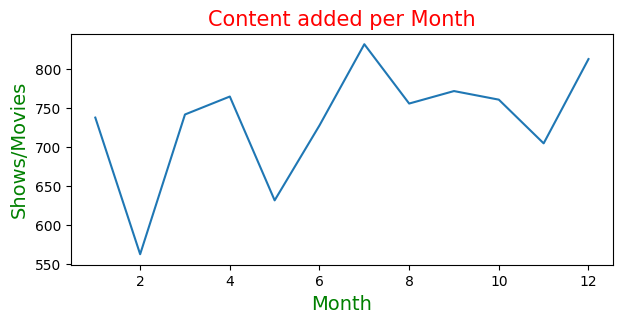

In [ ]:
df_month=temp3.reset_index()
plt.figure(figsize=(7,3))
sns.lineplot(data=df_month, x='month_added', y='show_id')
plt.xlabel('Month', color='green', fontsize= 14)
plt.ylabel('Shows/Movies', color='green', fontsize= 14)
plt.title('Content added per Month', color='red', fontsize= 15)
plt.show()

7th Month, i.e. July, has the maximum count of content added every year and the lowest id February.

## Seperate Analysis for Shows & Movies/Bi-variate Analysis

In [ ]:
#Seperate dataframes for TV shows and Movies

df_shows=d1[d1['type']=='TV Show']
df_movies=d1[d1['type']=='Movie']

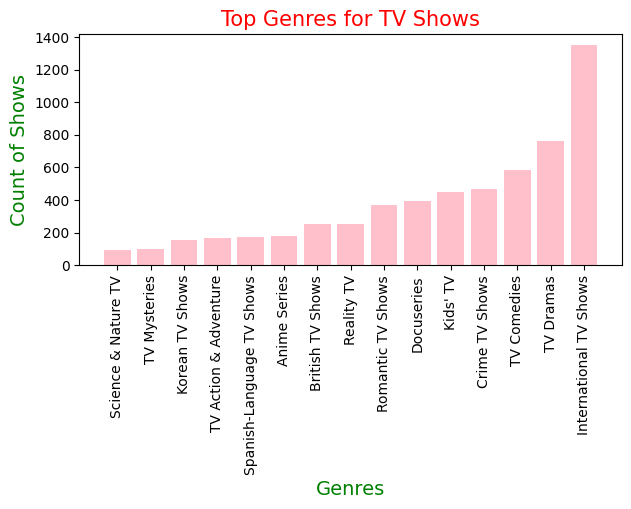

In [ ]:
#Genres for TV Shows

df_genre=df_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(7,3))
plt.bar(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['pink'])
plt.xlabel('Genres', color='green', fontsize= 14)
plt.xticks(rotation=90)
plt.ylabel('Count of Shows', color='green', fontsize= 14)
plt.title('Top Genres for TV Shows', color='red', fontsize= 15)
plt.show()

Most popular Genres are International TV Shows, Dramas and Comedy for TV Shows.

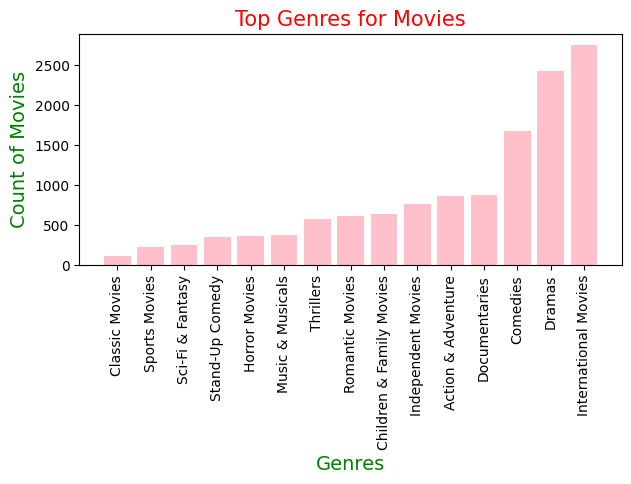

In [ ]:
#Genres for Movies

df_genres=df_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(7,3))
plt.bar(df_genres[::-1]['listed_in'], df_genres[::-1]['title'],color=['pink'])
plt.xlabel('Genres', color='green', fontsize= 14)
plt.xticks(rotation=90)
plt.ylabel('Count of Movies', color='green', fontsize= 14)
plt.title('Top Genres for Movies', color='red', fontsize= 15)
plt.show()

Most popular Genres are International TV Shows, Dramas and Comedy for Movies.

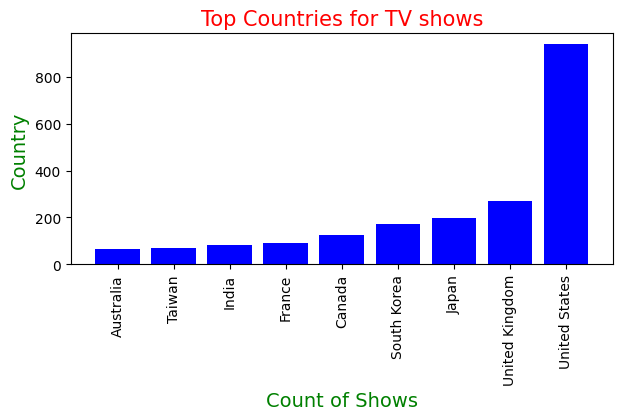

In [ ]:
#Top countries for TV shows production

df_country=df_shows.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_country=df_country[df_country['country']!='nan']
plt.figure(figsize=(7,3))
plt.bar(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Count of Shows', color='green', fontsize= 14)
plt.xticks(rotation=90)
plt.ylabel('Country', color='green', fontsize= 14)
plt.title('Top Countries for TV shows', color='red', fontsize= 15)
plt.show()

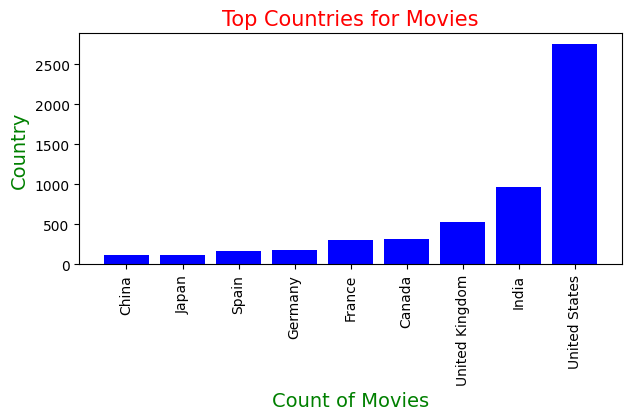

In [ ]:
#Top countries for Movies production

df_countries=df_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_countries=df_countries[df_countries['country']!='nan']
plt.figure(figsize=(7,3))
plt.bar(df_countries[::-1]['country'], df_countries[::-1]['title'],color=['blue'])
plt.xlabel('Count of Movies', color='green', fontsize= 14)
plt.xticks(rotation=90)
plt.ylabel('Country', color='green', fontsize= 14)
plt.title('Top Countries for Movies', color='red', fontsize= 15)
plt.show()

USA has the highest number of movies as well as TV Shows produced.

UK produces the second largest number of TV shows along with third largest number of Movies.

India leads the chart at second position for Movies, however, for the number of TV shows it comes at 7th position.

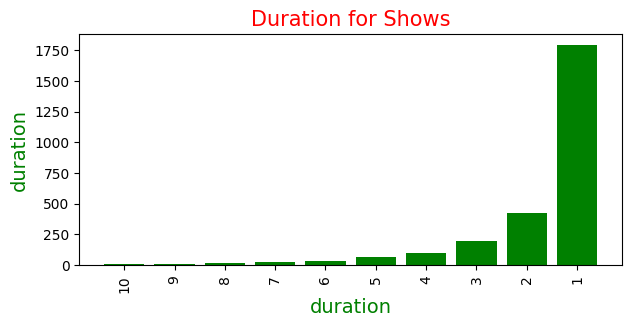

In [ ]:
#duration of TV shows

df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(7,3))
plt.bar(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['green'])
plt.xlabel('duration', color='green', fontsize= 14)
plt.xticks(rotation=90)
plt.ylabel('duration', color='green', fontsize= 14)
plt.title('Duration for Shows', color='red', fontsize= 15)
plt.show()

Maximum no. of TV shows have 1 seasons. very few of the shows have more than 6 seasons,

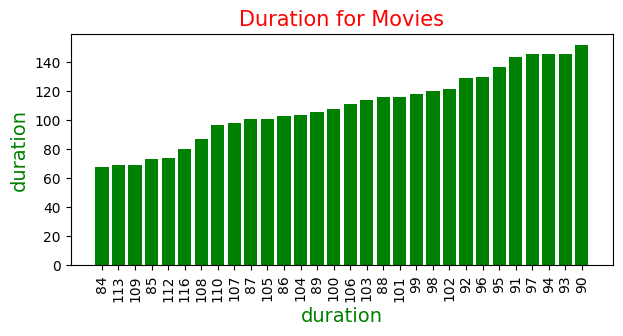

In [ ]:
#duration of movies

df_duration1=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:30]
plt.figure(figsize=(7,3))
plt.bar(df_duration1[::-1]['duration'], df_duration1[::-1]['title'],color=['green'])
plt.xlabel('duration', color='green', fontsize= 14)
plt.xticks(rotation=90)
plt.ylabel('duration', color='green', fontsize= 14)
plt.title('Duration for Movies', color='red', fontsize= 15)
plt.show()

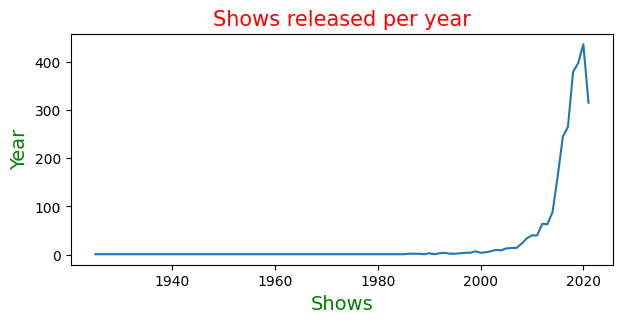

In [ ]:
#shows released per year

df_year=df_shows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(7,3))
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Year", color='green', fontsize= 14)
plt.xlabel("Shows", color='green', fontsize= 14)
plt.title('Shows released per year', color='red', fontsize= 15)
plt.show()

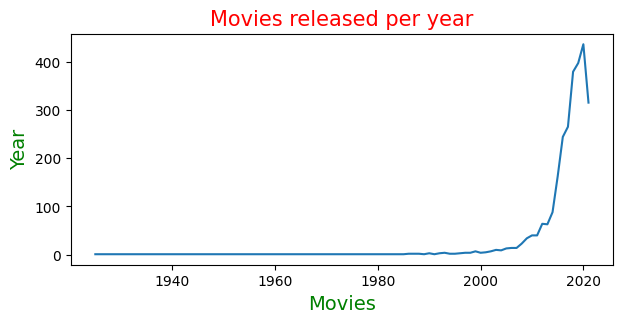

In [ ]:
#Movies released per year

df_years=df_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(7,3))
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Year", color='green', fontsize= 14)
plt.xlabel("Movies", color='green', fontsize= 14)
plt.title('Movies released per year', color='red', fontsize= 15)
plt.show()

Both Shows and Movies released per year have increased till 2019. There has been a fall after that may be due to Covid.

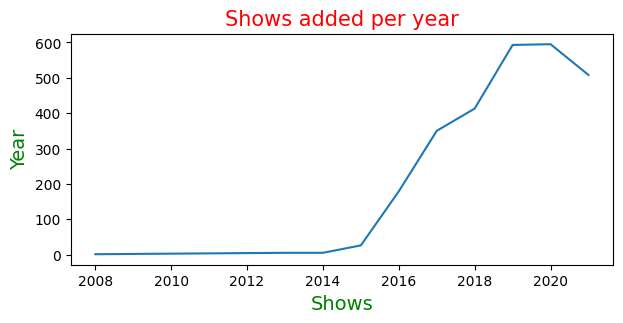

In [ ]:
#shows added on Netflix per year

df_added=df_shows.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(7,3))
sns.lineplot(data=df_added, x='year_added', y='title')
plt.ylabel("Year", color='green', fontsize= 14)
plt.xlabel("Shows", color='green', fontsize= 14)
plt.title('Shows added per year', color='red', fontsize= 15)
plt.show()

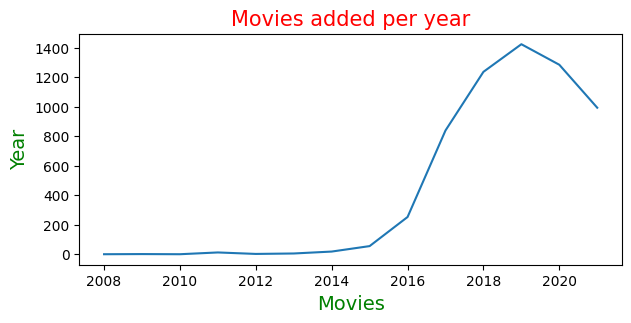

In [ ]:
#Movies added on Netflix per year

df_added1=df_movies.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(7,3))
sns.lineplot(data=df_added1, x='year_added', y='title')
plt.ylabel("Year", color='green', fontsize= 14)
plt.xlabel("Movies", color='green', fontsize= 14)
plt.title('Movies added per year', color='red', fontsize= 15)
plt.show()

The no. of shows as well as movies added per year have also gone down after 2019 due to less movies being released after Covid.

---



#Recommendations


---



1) The most popular Genres across all markets in both TV Shows and Movies are International TV Shows/Movies, Drama and Comedy respectively. So, further content addition should be made based on these genres.

2) Most of the movies, are of duration around 100 minutes and most of the TV shows have 1 season only so these durations should be kept in mind as these depict the attention span of a user.

3) Most of the movies/shows are added in July while the lowest in February. These timelines should be considered while making any addition on the platform.

4) Most popular actors and directors names should be kept in consideration while adding any content as people are more likely to watch those shows/movies.

5) People prefer more movies produced in US, India and UK and more shows produced in US, UK and Japan. So, Netflix should try to add more content from these countries to increase viewership.

6) There has been decline in content addition on the platform since Covid. The situation is better now and efforts should be made to change the declining graph.

